In [1]:
import numpy as np
import scipy.stats as scistats
from matplotlib import pyplot as plt

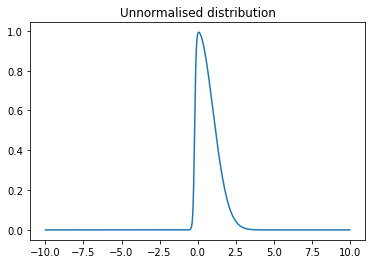

In [4]:
x_grid = np.linspace(-10, 10, 10000)

def pdf(x):
    
    return np.exp(-1/2 * x**2) * 1/(1 + np.exp(-20 * x - 4))

def logpdf(x):
    
    return -1/2 * x**2 - np.log(1 + np.exp(-20*x - 4))

plt.figure()
plt.title("Unnormalised distribution")
plt.plot(x_grid, pdf(x_grid))
plt.show()

## Metropolis Algorithm

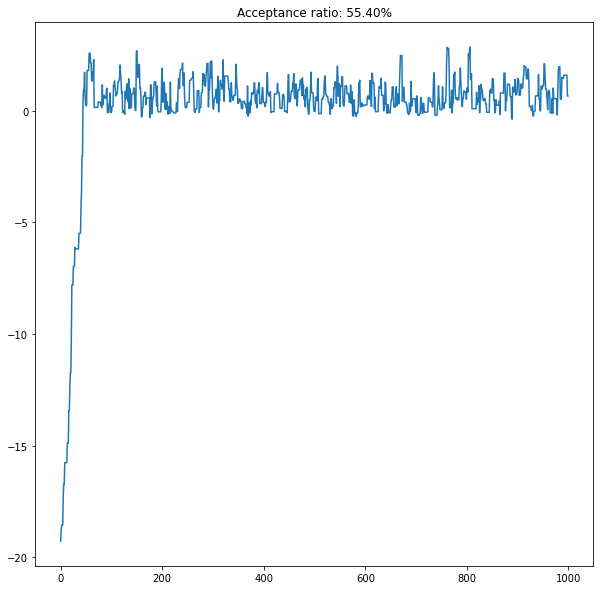

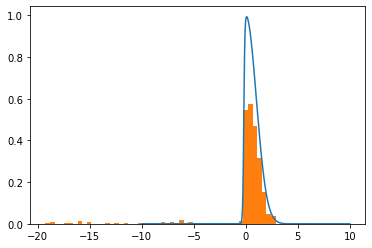

In [35]:
q_proposal = scistats.norm
proposal_scale = 1

def A_M(x_proposal, x_i):
    return min(1.0, pdf(x_proposal) / pdf(x_i))

#Sample a proposal value
x_0 = -20 #Warming up
samples = []
acc = 0
total = 1000

for i in range(total):
    x_prop = q_proposal.rvs(loc = x_0, scale = proposal_scale, size = 1)[0]
    A_i = A_M(x_prop, x_0)
    
    if A_i > np.random.random():
        x_0 = x_prop
        acc += 1
    
    samples.append(x_0)
    
plt.figure(figsize = (10, 10))
plt.title("Acceptance ratio: {:.2f}%".format(acc / total * 100))
plt.plot(samples)
plt.show()

plt.figure()
plt.plot(x_grid, pdf(x_grid))
plt.hist(samples, density = True, bins = 50)
plt.show()

## Metropolis-Hastings algorithm

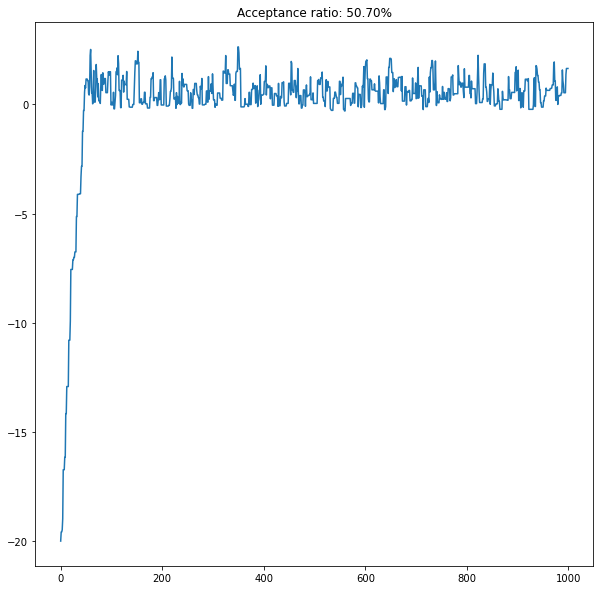

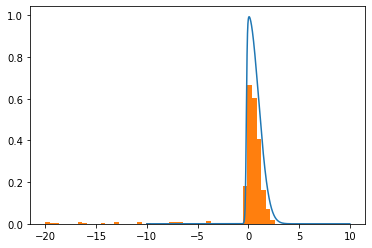

In [37]:
q_proposal = scistats.norm
proposal_scale = 1

def A_MH(x_proposal, x_i):
    
    r1 = pdf(x_proposal) / pdf(x_i)
    r2 = q_proposal.pdf(x_i, loc = x_proposal, scale = proposal_scale) / q_proposal.pdf(x_proposal, loc = x_i, scale = proposal_scale)
    
    r = r1 * r2
    
    return min(1.0, r)

#Sample a proposal value
x_0 = -20 #Warming up
samples = []
acc = 0
total = 1000

for i in range(total):
    x_prop = q_proposal.rvs(loc = x_0, scale = proposal_scale, size = 1)[0]
    A_i = A_MH(x_prop, x_0)
    
    if A_i > np.random.random():
        x_0 = x_prop
        acc += 1
    
    samples.append(x_0)
    
plt.figure(figsize = (10, 10))
plt.title("Acceptance ratio: {:.2f}%".format(acc / total * 100))
plt.plot(samples)
plt.show()

plt.figure()
plt.plot(x_grid, pdf(x_grid))
plt.hist(samples, density = True, bins = 50)
plt.show()

In [ ]:
#Highlight the importance of thinning and warm-up period